# Birth Rates 2022-2023

Note: The README for this notbook is contained in the root folder. 

My background is General Nursing, Childrens Nursing, Midwifery and lactation Consultancy. Because of this I choose for this assignment to look at and analyse the birth rates in Ireland for 2022 and 2023. At the time of doing this assignment the figures for 2024 were not available. The figures within the data set are helpful to managers within the HSE to inform deciosions on resource allocation such as appropriately trained staff. Extra resources cannot be applied for or allocated without properly annalysed data. 

### Importing libraries

In [36]:
import os
import requests
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Import the data

In [37]:
file_path = "birth records 2022-23.csv"

df = pd.read_csv(file_path)


### Checking the data

In [38]:
print(df.head())

   Year   County of Residence  Births Registered  First Births Registered  \
0  2022               Ireland              57495                  22939.0   
1  2022     Cork City Council               1164                      NaN   
2  2022  Clare County Council               1279                      NaN   
3  2022  Cavan County Council               1039                      NaN   
4  2022   Cork County Council               4906                      NaN   

   Births within Marriage  Births outside Marriage  \
0                   32757                    24738   
1                     592                      572   
2                     734                      545   
3                     600                      439   
4                    3036                     1870   

   Average Age of Mother - First Births only  \
0                                       31.5   
1                                       31.3   
2                                       32.2   
3                   

In [39]:
print(df.tail())

    Year              County of Residence  Births Registered  \
59  2023         Tipperary County Council               1736   
60  2023  Waterford City & County Council               1290   
61  2023         Westmeath County Council               1089   
62  2023           Wicklow County Council               1588   
63  2023           Wexford County Council               1772   

    First Births Registered  Births within Marriage  Births outside Marriage  \
59                      NaN                     930                      806   
60                      NaN                     719                      571   
61                      NaN                     616                      473   
62                      NaN                     920                      668   
63                      NaN                     891                      881   

    Average Age of Mother - First Births only  \
59                                       30.6   
60                                  

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    64 non-null     int64  
 1   County of Residence                                     64 non-null     object 
 2   Births Registered                                       64 non-null     int64  
 3   First Births Registered                                 2 non-null      float64
 4   Births within Marriage                                  64 non-null     int64  
 5   Births outside Marriage                                 64 non-null     int64  
 6   Average Age of Mother - First Births only               64 non-null     float64
 7   Average Age of Mothers First Births - outside marriage  64 non-null     float64
 8   Average Age of Mother - outside Marriage  

Print the column names. This is useful when extracting the data to know what each column name is

In [41]:
print(df.columns)

Index(['Year', 'County of Residence', 'Births Registered',
       'First Births Registered', 'Births within Marriage',
       'Births outside Marriage', 'Average Age of Mother - First Births only',
       'Average Age of Mothers First Births - outside marriage',
       'Average Age of Mother - outside Marriage', 'Average Age of Mothers'],
      dtype='object')


In [42]:
print(df.describe())

              Year  Births Registered  First Births Registered  \
count    64.000000          64.000000                 2.000000   
mean   2022.500000        3503.656250             22699.000000   
std       0.503953        9610.831996               339.411255   
min    2022.000000         338.000000             22459.000000   
25%    2022.000000         937.750000             22579.000000   
50%    2022.500000        1472.000000             22699.000000   
75%    2023.000000        2308.750000             22819.000000   
max    2023.000000       57495.000000             22939.000000   

       Births within Marriage  Births outside Marriage  \
count               64.000000                64.000000   
mean              2033.468750              1470.187500   
std               5575.492188              4041.341298   
min                216.000000               122.000000   
25%                533.750000               395.000000   
50%                829.500000               624.000000   

In [43]:
df.dtypes

Year                                                        int64
County of Residence                                        object
Births Registered                                           int64
First Births Registered                                   float64
Births within Marriage                                      int64
Births outside Marriage                                     int64
Average Age of Mother - First Births only                 float64
Average Age of Mothers First Births - outside marriage    float64
Average Age of Mother - outside Marriage                  float64
Average Age of Mothers                                    float64
dtype: object

## Bar plot of total births per year

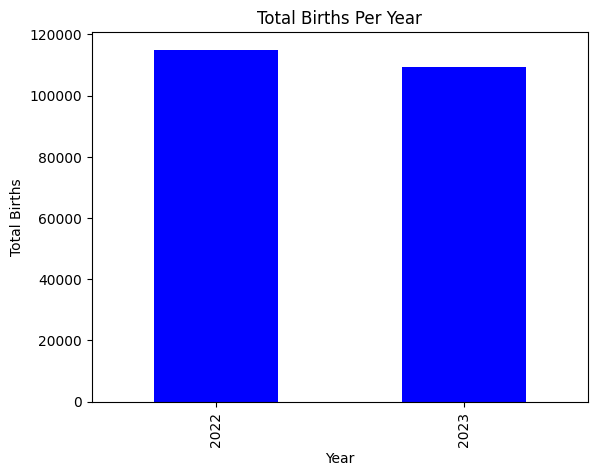

In [44]:
total_births_per_year = df.groupby('Year')['Births Registered'].sum()

total_births_per_year.plot(kind='bar', color='blue')

plt.title('Total Births Per Year')
plt.xlabel('Year')
plt.ylabel('Total Births')

# Show the plot
plt.show()

From this bar chart we can see that the birth rate dropped in 2023. From the dataset we can see that the birth rate was 57495 in 2022 and 54622 in 2023. The figures for 2024 were not available at this time. 

## Pie Charts

Pie chart representing primaparous mothers (first births) and multiparous mothers (more than once but less than five times) in 2022 .

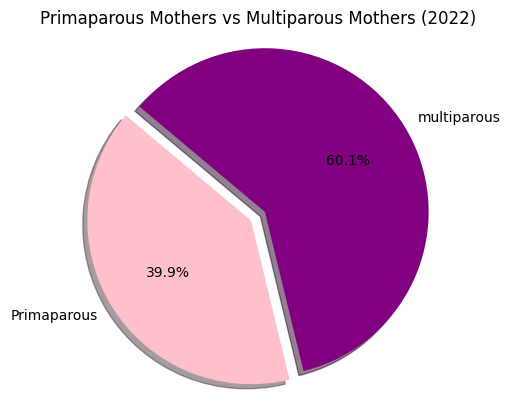

In [45]:
# Data to plot
labels = ['Primaparous', 'multiparous']
sizes = [22939, 34556]  # Ensure sizes match the length of labels
colors = ['pink', 'purple']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Primaparous Mothers vs Multiparous Mothers (2022)')
plt.show()

Pie chart representing the data for 2023

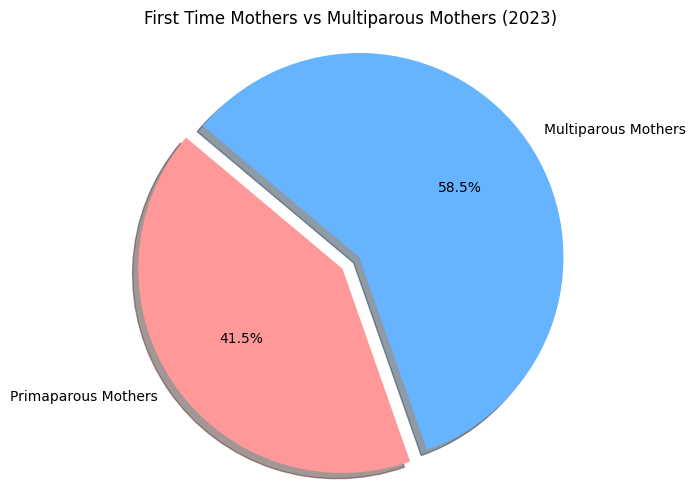

In [46]:
labels = ['Primaparous Mothers', 'Multiparous Mothers']
sizes = [22459, 31683] 
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('First Time Mothers vs Multiparous Mothers (2023)')
plt.show()

Dropping the 'Ireland' column in order to visualise each individual county

In [47]:
df = df[df['County of Residence'] != 'Ireland']

## Bar Charts of Births registered by county per year

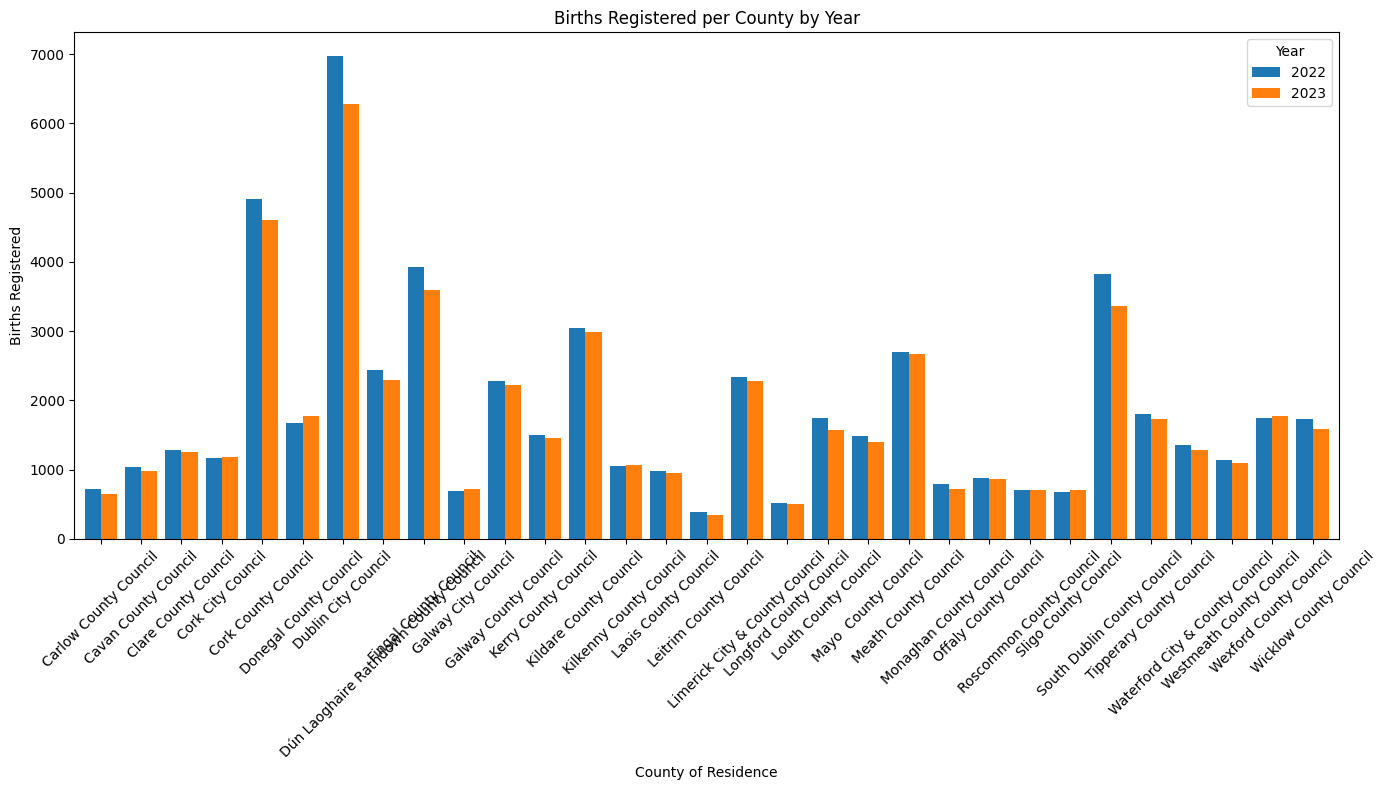

In [48]:
# Ensure the DataFrame df is not empty
if not df.empty:
	# Group the data by 'County of Residence' and 'Year' and sum the 'Births Registered'
	county_year_data = df.groupby(['County of Residence', 'Year'])['Births Registered'].sum().unstack()

	# Plot the bar graph
	county_year_data.plot(kind='bar', figsize=(14, 8), width=0.8)

	plt.title('Births Registered per County by Year')
	plt.xlabel('County of Residence')
	plt.ylabel('Births Registered')
	plt.xticks(rotation=45)
	plt.legend(title='Year')
	plt.tight_layout()

	# Show the plot
	plt.show()
else:
	print("The DataFrame 'df' is empty. Please check the data import step.")

What this graph shows us is the births per county of residence for both 2022 and 2023. This can lead to decisions by the HSE where to focus maternity and PHN resources. 

Primaparous mothers, average age when compared by county in 2022 and 2023

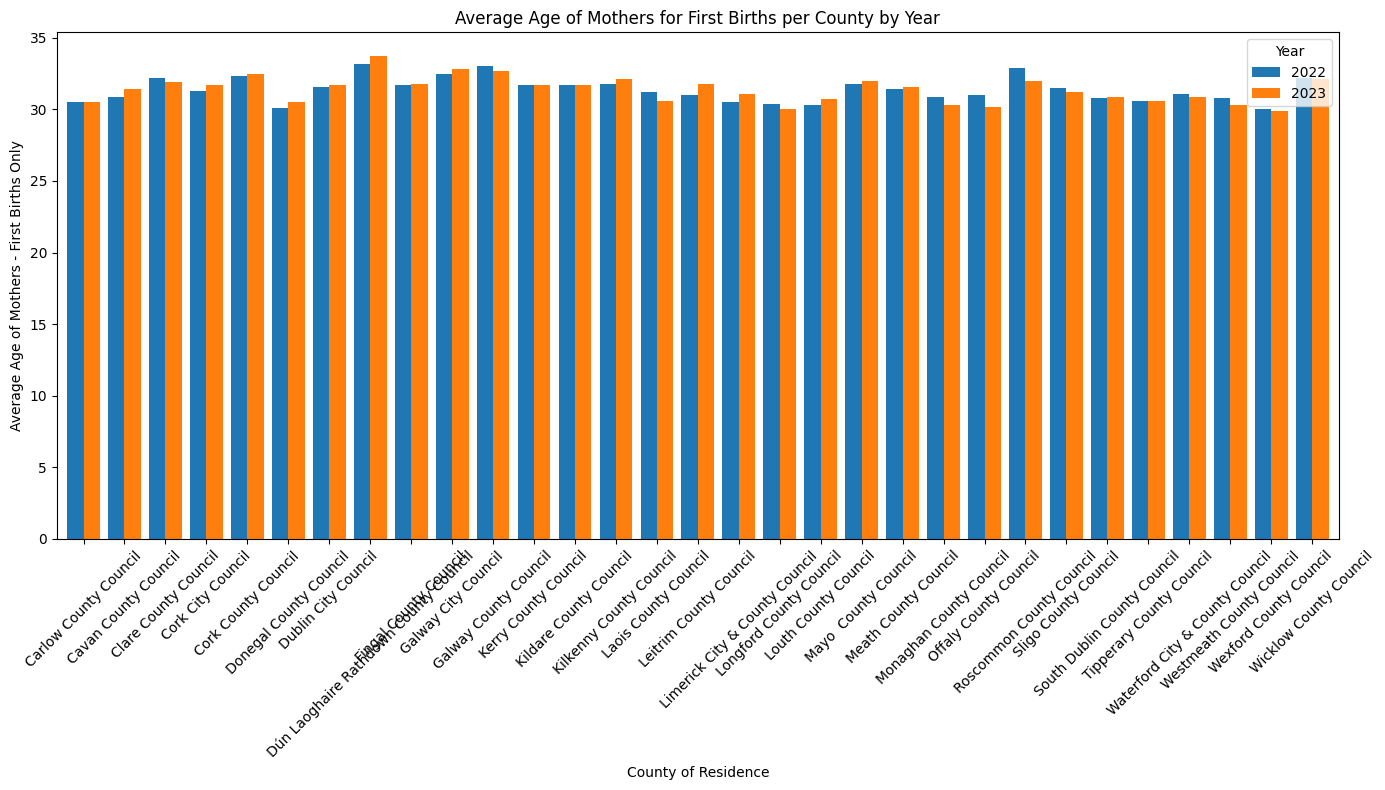

In [49]:
if not df.empty:
	# Group the data by 'County of Residence' and 'Year' and sum the 'Average Age of Mother - First Births only'
	average_age_data = df.groupby(['County of Residence', 'Year'])['Average Age of Mother - First Births only'].mean().unstack()

	# Plot the bar graph
	average_age_data.plot(kind='bar', figsize=(14, 8), width=0.8)

	plt.title('Average Age of Mothers for First Births per County by Year')
	plt.xlabel('County of Residence')
	plt.ylabel('Average Age of Mothers - First Births Only')
	plt.xticks(rotation=45)
	plt.legend(title='Year')
	plt.tight_layout()

	# Show the plot
	plt.show()
else:
	print("The DataFrame 'df' is empty. Please check the data import step.")

This graph tells us that the average age of first time mothers is fairly uniform over the counties. The average age is early 30's. The data is not easily visualised so I will use a scatterplot matrix to see if the data is better visualised. This would inform HSE decision making as very young and older mother require age specific information and healthcare. 

## Scatter Plot illustrating the average age of nulparious women and their multiparous counterparts.

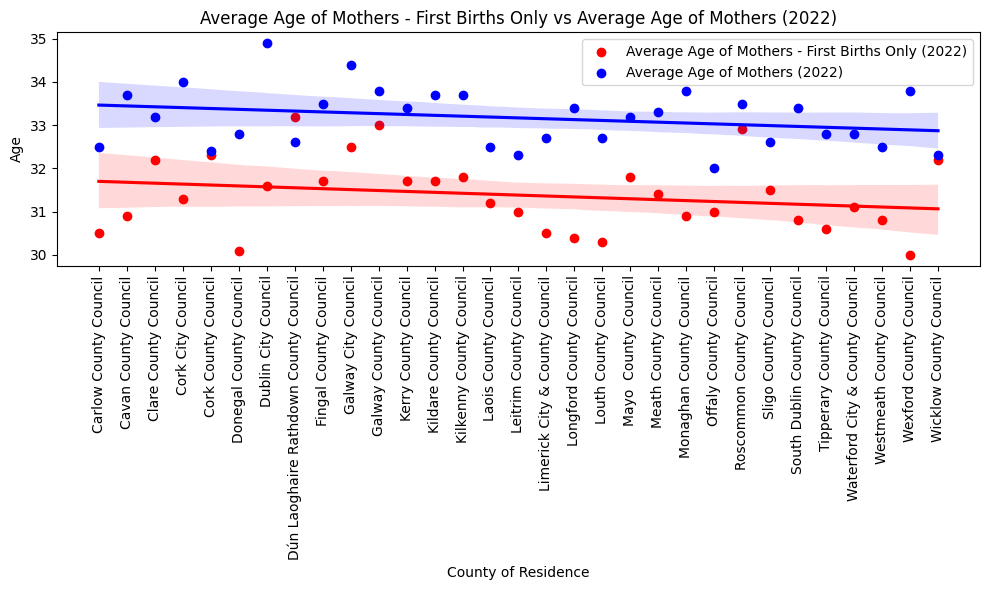

In [50]:
plt.figure(figsize=(10, 6))

# Convert the index to a numeric format for plotting
x_numeric = np.arange(len(average_age_data.index))

# Scatter plot for Average Age of Mothers - First Births Only (2022)
plt.scatter(x_numeric, average_age_data[2022], color='red', label='Average Age of Mothers - First Births Only (2022)')

# Scatter plot for Average Age of Mothers (2022)
plt.scatter(x_numeric, df[df['Year'] == 2022]['Average Age of Mothers'], color='blue', label='Average Age of Mothers (2022)')

# Adding correlation line using seaborn
sns.regplot(x=x_numeric, y=average_age_data[2022], scatter=False, color='red')
sns.regplot(x=x_numeric, y=df[df['Year'] == 2022]['Average Age of Mothers'], scatter=False, color='blue')

plt.title('Average Age of Mothers - First Births Only vs Average Age of Mothers (2022)')
plt.xlabel('County of Residence')
plt.ylabel('Age')
plt.xticks(ticks=x_numeric, labels=average_age_data.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


We can see in the above plot, with the aid of the correlation line that the average age of first time mothers is lower than their multiparious counterparts in 2022. 

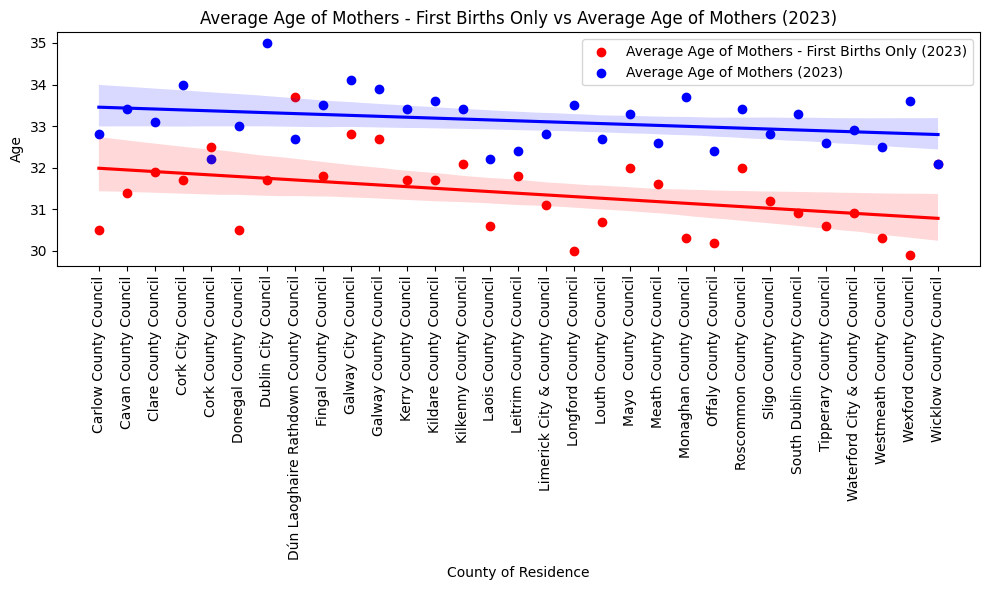

In [51]:
plt.figure(figsize=(10, 6))

x_numeric = np.arange(len(average_age_data.index))

plt.scatter(x_numeric, average_age_data[2023], color='red', label='Average Age of Mothers - First Births Only (2023)')

plt.scatter(x_numeric, df[df['Year'] == 2023]['Average Age of Mothers'], color='blue', label='Average Age of Mothers (2023)')

# Adding correlation line using seaborn
sns.regplot(x=x_numeric, y=average_age_data[2023], scatter=False, color='red')
sns.regplot(x=x_numeric, y=df[df['Year'] == 2023]['Average Age of Mothers'], scatter=False, color='blue')

plt.title('Average Age of Mothers - First Births Only vs Average Age of Mothers (2023)')
plt.xlabel('County of Residence')
plt.ylabel('Age')
plt.xticks(ticks=x_numeric, labels=average_age_data.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Again similar correlation is seen for 2023.

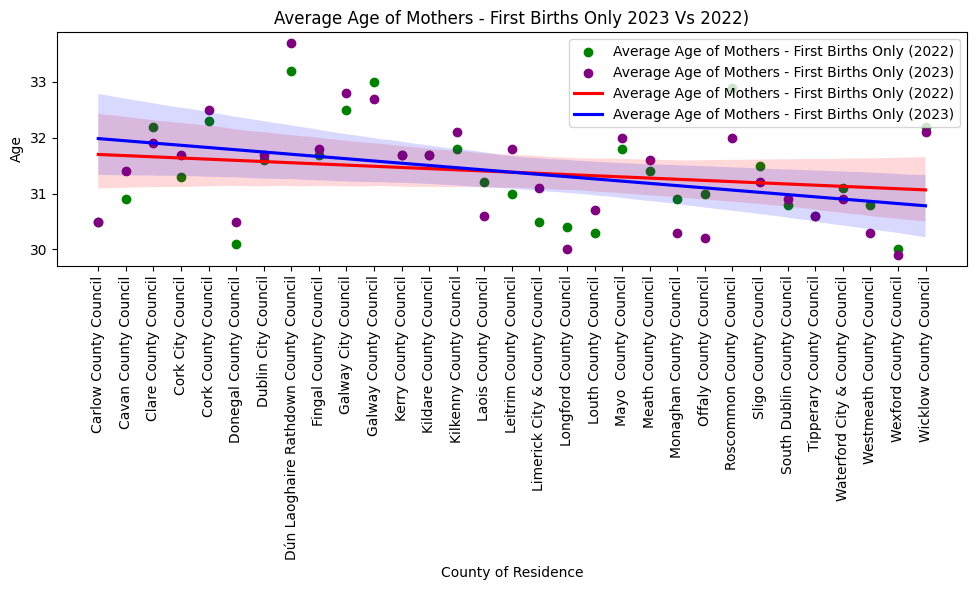

In [52]:
plt.figure(figsize=(10, 6))

x_numeric = np.arange(len(average_age_data.index))

plt.scatter(x_numeric, average_age_data[2022], color='green', label='Average Age of Mothers - First Births Only (2022)')
plt.scatter(x_numeric, average_age_data[2023], color='purple', label='Average Age of Mothers - First Births Only (2023)')

sns.regplot(x=x_numeric, y=average_age_data[2022], scatter=False, color='red', label='Average Age of Mothers - First Births Only (2022)')
sns.regplot(x=x_numeric, y=average_age_data[2023], scatter=False, color='blue', label='Average Age of Mothers - First Births Only (2023)') 

plt.title('Average Age of Mothers - First Births Only 2023 Vs 2022)')
plt.xlabel('County of Residence')
plt.ylabel('Age')
plt.xticks(ticks=x_numeric, labels=average_age_data.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

From the above scatter plot with correlation line, it appears that the age that mothers give birth is dropping. 

The above is a tentative analysis of the birth rate data from the CSO. Care must be taken as the data set is quite limited. Birth rates change every year and if the data is to have a stronger standing more year would have to be analysed in order to see any trends more clearly. From a short term perspective however, this data is important as it can tell management that more or less Public Health Nurses are required in a particular year depending on the birth rate. All infants/children are followed up by the PHN until the age that they start school. It can also tell how many vaccinations will be required during the following 12 months. All children are given the opportunity to be vaccinated at 2, 4, 6, 12, and 13 months. So if the information regarding births are known we can estimate how many vaccinations will be needed. This of course does not take into account the children that move into or out of an area. 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

Separate features and target

In [54]:
X = df.drop('Births Registered', axis=1)
y = df['Births Registered']

Identify numerical and categorical columns

In [55]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


Preprocessing pipelines for numerical and categorical data

In [64]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


Combine preprocessing steps

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)])

Create a pipeline that includes preprocessing and model training

In [66]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

Split data into training and testing sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In [68]:
# Fit the model
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['First Births Registered']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Year', 'First Births Registered', 'Births within Marriage',
       'Births outside Marriage', 'Average Age of Mother - First Births only',
       'Average Age of Mothers First Births - outside marriage',
       'Average Age of Mother - outside Marriage', 'Average Age of Mothers'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['County of Residence'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

Make predictions

In [71]:
# Ensure the model is trained before making predictions
if hasattr(model, 'fit'):
	y_pred = model.predict(X_test)
else:
	print("The model is not trained. Please train the model before making predictions.")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['First Births Registered']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Evaluate the model

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


### END